In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
import torch, torchvision
print(torch.__version__)
print(torchvision.__version__)

1.7.1+cu101
0.8.2+cu101


In [4]:
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"# DEVICE {i}: {torch.cuda.get_device_name(i)}")
        print("- Memory Usage:")
        print(f"  Allocated: {round(torch.cuda.memory_allocated(i)/1024**3,1)} GB")
        print(f"  Cached:    {round(torch.cuda.memory_cached(i)/1024**3,1)} GB\n")
        
else:
    print("# GPU is not available")

# DEVICE 0: Tesla V100-PCIE-32GB
- Memory Usage:
  Allocated: 0.0 GB
  Cached:    0.0 GB

# DEVICE 1: Tesla V100-PCIE-32GB
- Memory Usage:
  Allocated: 0.0 GB
  Cached:    0.0 GB

# DEVICE 2: Tesla V100-PCIE-32GB
- Memory Usage:
  Allocated: 0.0 GB
  Cached:    0.0 GB



/opt/conda/lib/python3.7/site-packages/torch/cuda/memory.py:346: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


In [7]:
# GPU 할당 변경하기
GPU_NUM = 2 # 원하는 GPU 번호 입력
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device) # change allocation of current GPU

print ('# Current cuda device: ', torch.cuda.current_device()) # check

if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print(f"using cuda: {GPU_NUM}, {torch.cuda.get_device_name(GPU_NUM)}")

# Current cuda device:  2
using cuda: 2, Tesla V100-PCIE-32GB


In [8]:
import h5py
import zipfile
import imageio
import os

In [9]:
os.listdir("./myo_gan/img_align_celeba_20000")

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [11]:
count = 0
img_celeba = os.listdir("./myo_gan/img_align_celeba_20000")
for img in img_celeba:
    if img.endswith(".jpg"):
        count += 1

In [12]:
count

20000

In [15]:
img_celeba[0]

'000001.jpg'

In [19]:
fdata = np.arange(5)
print(fdata)

f = h5py.File("dataset.h5", "w")
data1 = f.create_dataset("data1", data=fdata)

[0 1 2 3 4]


In [26]:
data1[()]

array([0, 1, 2, 3, 4])

In [34]:
%%time

hdf5_file = './myo_gan/celeba_aligned_small.h5py'
img_celeba = os.listdir("./myo_gan/img_align_celeba_20000")

with h5py.File(hdf5_file, "w") as hf:
    count = 0
    
    for f in img_celeba:
        if f.endswith(".jpg"):
            img = imageio.imread(f"./myo_gan/img_align_celeba_20000/{f}")
            hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
            count += 1
            
        if (count%1000 == 0):
            print("images done .. ", count)
            pass
            
        # stop when total_images reached
        if (count == len(img_celeba)):
            break
            pass


images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000
images done ..  20000
CPU times: user 2min 59s, sys: 3.74 s, total: 3min 3s
Wall time: 3min 3s


(218, 178, 3)


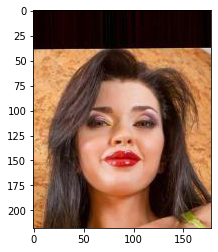

In [43]:
# open HDF5 file and list any groups

with h5py.File("./myo_gan/celeba_aligned_small.h5py", "r") as file_object:
#     for group in file_object:
#         print(group)
    dataset = file_object["img_align_celeba"]
    image = np.array(dataset["77.jpg"])
    plt.imshow(image)
    
    print(image.shape)

In [45]:
from torch.utils.data import Dataset

class CelebADataset(Dataset):
    def __init__(self, file):
        self.file_object = h5py.File(file, "r")
        self.dataset = self.file_object["img_align_celeba"]
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        if index >= len(self.dataset):
            raise IndexError()
        img = np.array(self.dataset[f"{str(index)}.jpg"])
        return torch.Tensor(img)/255.0
    
    def plot_image(self, index):
        img = self.dataset[f"{str(index)}.jpg"]
        plt.imshow(img)
        

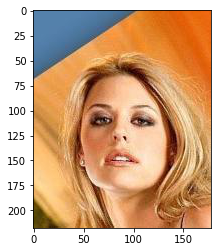

In [68]:
celeba_dataset = CelebADataset("./myo_gan/celeba_aligned_small.h5py")
celeba_dataset.plot_image(23)

In [69]:
import torch.nn as nn

def generate_random_image(size):
    random_data = torch.rand(size)
    return random_data

def generate_random_seed(size):
    random_data = torch.randn(size)
    return random_data

In [70]:
class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,
    
    def forward(self, x):
        return x.view(*self.shape)

In [128]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            View(218*178*3),
            
            nn.Linear(3*218*178, 100),
            nn.LeakyReLU(),
            
            nn.LayerNorm(100),
            
            nn.Linear(100, 1),
            nn.Sigmoid()
        )
        self.model = self.model.cuda()
        
        self.loss_function = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        
        loss = self.loss_function(outputs, targets)
        
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            
        if self.counter % 1000000 == 0:
            print(f"counter = {self.counter}")
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=["loss"])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker=".", grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))

In [102]:
218*178*3

116412

In [103]:
D = Discriminator()

for image_data_tensor in celeba_dataset:
    D.train(image_data_tensor, torch.Tensor([1.0]))
    D.train(generate_random_image((218, 178, 3)), torch.Tensor([0.0]))

counter = 10000
counter = 20000
counter = 30000
counter = 40000


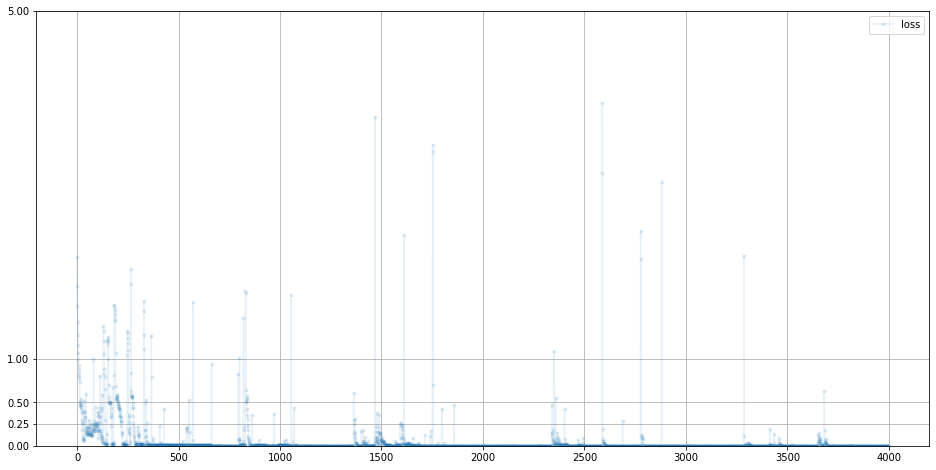

In [104]:
D.plot_progress()

In [106]:
import random

for i in range(4):
    image_data_tensor = celeba_dataset[random.randint(0, 20000)]
    print(D.forward(image_data_tensor).item())

0.9996297359466553
0.9994090795516968
0.9993982315063477
0.9996265172958374


In [107]:
for i in range(4):
    print(D.forward(generate_random_image((218, 178, 3))).item())

0.0001057447079801932
0.0001089736761059612
0.00010917452163994312
0.00010496582399355248


In [119]:
class Generator(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(100, 3*10*10),
            nn.LeakyReLU(),
            
            nn.LayerNorm(3*10*10),
            
            nn.Linear(3*10*10, 3*218*178),
            nn.Sigmoid(),
            View((218, 178, 3))
        )
        self.model = self.model.cuda()
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)
        
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        
        d_output = D.forward(g_output)
        
        loss = D.loss_function(d_output, targets)
        
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=["loss"])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker=".", grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))

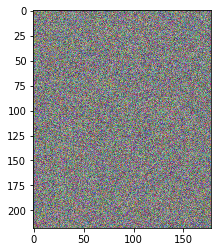

In [120]:
G = Generator()

output = G.forward(generate_random_seed(100))
img = output.detach().cpu().numpy()
plt.imshow(img, cmap="Blues")

In [121]:
%%time

# 1 epoch

D = Discriminator()
G = Generator()

epochs = 1

for epoch in range(epochs):
    print(f"# epoch = {epoch+1}")
    
    for image_data_tensor in celeba_dataset:
        
        D.train(image_data_tensor, torch.Tensor([1.0]))
        
        D.train(G.forward(generate_random_seed(100)).detach(), torch.Tensor([0.0]))
        
        G.train(D, generate_random_seed(100), torch.Tensor([1.0]))

# epoch = 1
counter = 10000
counter = 20000
counter = 30000
counter = 40000
CPU times: user 31min 9s, sys: 36min 42s, total: 1h 7min 51s
Wall time: 4min 43s


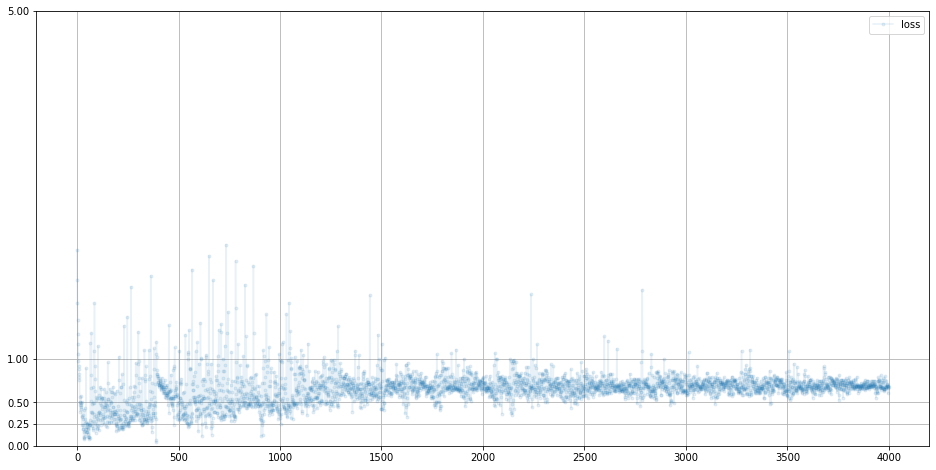

In [122]:
D.plot_progress()

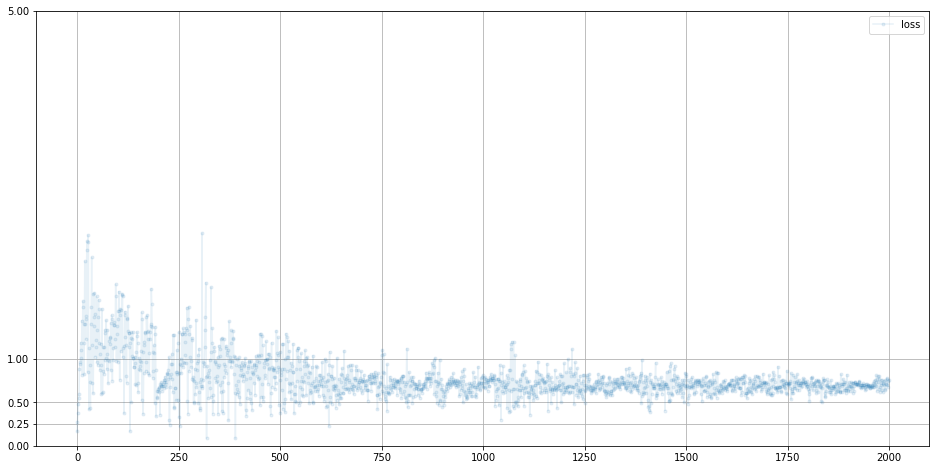

In [123]:
G.plot_progress()

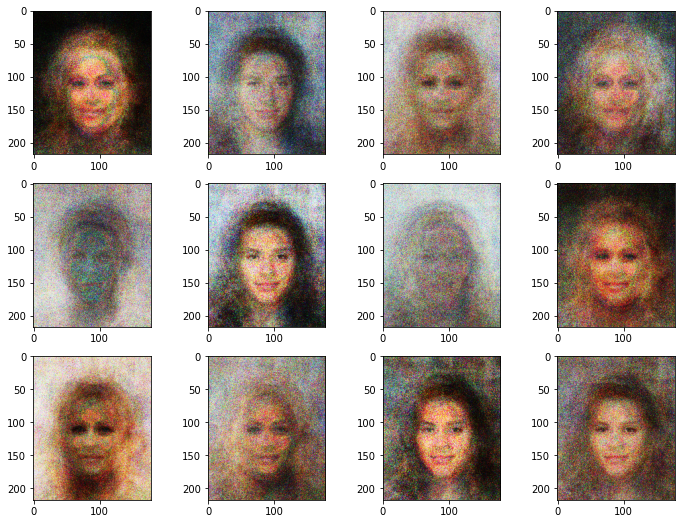

In [126]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))

for ax in axes.ravel():
    output = G.forward(generate_random_seed(100))
    img = output.detach().cpu()
    ax.imshow(img)
    count += 1

# epoch = 1
# epoch = 2
# epoch = 3
# epoch = 4
# epoch = 5
# epoch = 6
# epoch = 7
# epoch = 8
# epoch = 9
# epoch = 10
# epoch = 11
# epoch = 12
# epoch = 13
# epoch = 14
# epoch = 15
# epoch = 16
# epoch = 17
# epoch = 18
# epoch = 19
# epoch = 20
# epoch = 21
# epoch = 22
# epoch = 23
# epoch = 24
# epoch = 25
counter = 1000000
# epoch = 26
# epoch = 27
# epoch = 28
# epoch = 29
# epoch = 30
# epoch = 31
# epoch = 32
# epoch = 33
# epoch = 34
# epoch = 35
# epoch = 36
# epoch = 37
# epoch = 38
# epoch = 39
# epoch = 40
# epoch = 41
# epoch = 42
# epoch = 43
# epoch = 44
# epoch = 45
# epoch = 46
# epoch = 47
# epoch = 48
# epoch = 49
# epoch = 50
counter = 2000000
# epoch = 51
# epoch = 52
# epoch = 53
# epoch = 54
# epoch = 55
# epoch = 56
# epoch = 57
# epoch = 58
# epoch = 59
# epoch = 60
# epoch = 61
# epoch = 62
# epoch = 63
# epoch = 64
# epoch = 65
# epoch = 66
# epoch = 67
# epoch = 68
# epoch = 69
# epoch = 70
# epoch = 71
# epoch = 72
# epoch = 73
# epoch = 74
# epoch = 7

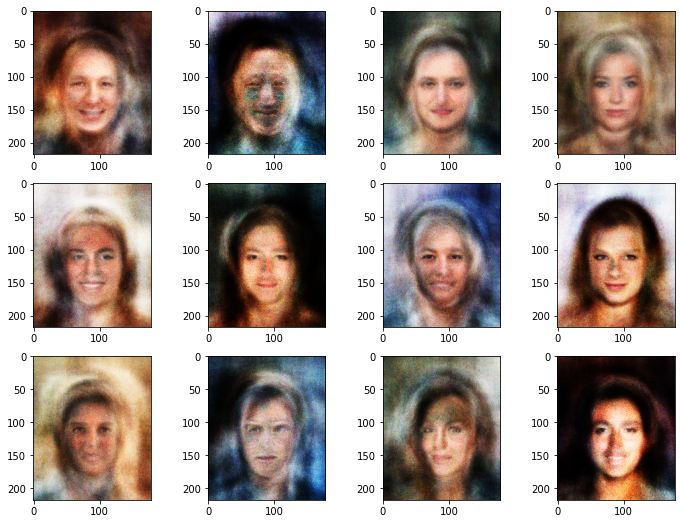

In [131]:
%%time

# 1000 epoch

D = Discriminator()
G = Generator()

epochs = 1000

for epoch in range(epochs):
    print(f"# epoch = {epoch+1}")
    
    for image_data_tensor in celeba_dataset:
        
        D.train(image_data_tensor, torch.Tensor([1.0]))
        
        D.train(G.forward(generate_random_seed(100)).detach(), torch.Tensor([0.0]))
        
        G.train(D, generate_random_seed(100), torch.Tensor([1.0]))
        
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))

for ax in axes.ravel():
    output = G.forward(generate_random_seed(100))
    img = output.detach().cpu()
    ax.imshow(img)
    count += 1

In [ ]:
%%time

# 3000 epoch

D = Discriminator()
G = Generator()

epochs = 3000

for epoch in range(epochs):
    print(f"# epoch = {epoch+1}")
    
    for image_data_tensor in celeba_dataset:
        
        D.train(image_data_tensor, torch.Tensor([1.0]))
        
        D.train(G.forward(generate_random_seed(100)).detach(), torch.Tensor([0.0]))
        
        G.train(D, generate_random_seed(100), torch.Tensor([1.0]))
        
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))

for ax in axes.ravel():
    output = G.forward(generate_random_seed(100))
    img = output.detach().cpu()
    ax.imshow(img)
    count += 1

# epoch = 1
# epoch = 2
# epoch = 3
# epoch = 4
# epoch = 5
# epoch = 6
# epoch = 7
# epoch = 8
# epoch = 9
# epoch = 10
# epoch = 11
# epoch = 12
# epoch = 13
# epoch = 14
# epoch = 15
# epoch = 16
# epoch = 17
# epoch = 18
# epoch = 19
# epoch = 20
# epoch = 21
# epoch = 22
# epoch = 23
# epoch = 24
# epoch = 25
counter = 1000000
# epoch = 26
# epoch = 27
# epoch = 28
# epoch = 29
# epoch = 30
# epoch = 31
# epoch = 32
# epoch = 33
# epoch = 34
# epoch = 35
# epoch = 36
# epoch = 37
# epoch = 38
# epoch = 39
# epoch = 40
# epoch = 41
# epoch = 42
# epoch = 43
# epoch = 44
# epoch = 45
# epoch = 46
# epoch = 47
# epoch = 48
# epoch = 49
# epoch = 50
counter = 2000000
# epoch = 51
# epoch = 52
# epoch = 53
# epoch = 54
# epoch = 55
# epoch = 56
# epoch = 57
# epoch = 58
# epoch = 59
# epoch = 60
# epoch = 61
# epoch = 62
# epoch = 63
# epoch = 64
# epoch = 65
# epoch = 66
# epoch = 67
# epoch = 68
# epoch = 69
# epoch = 70
# epoch = 71
# epoch = 72
# epoch = 73
# epoch = 74
# epoch = 7